# Amazon Reviews on kindle products

### The scope of the project is to explore the reviews submitted by users and understand in depth about the recommendations

The outline for the project will be as follows- 
1. Understand and clean the data
    - Check for null values
    - Drop columns which arent useful
2. Speculate whether ratings are genuine ?
    - what if the one user is trying to give all rating ?
    - How will the distribution look for bulk users ?
    - How many users are bulk ?
3. Find the NPS net promoter score of amazon
    - What's NPS score ?
    - How do we calculated for amazon  ?
4. Pick a product and deep dive
    - We will pick one variation of kindle product drill & analyse its characteristics
5. [Paper white kindle] - NPS score  ? 
6. [Paper white kindle] - Plot time series for review
    - How to handle date time text ?
    - How to plot time series on a graph ? 
    - How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
    - Did the performance (NPS) go up or down with time ?
7. [Paper white kindle] Predict Recommendations based on reviews content
    - Make a clean function
        - Remove punctuations
        - Remove stopwords
        - Stem vs Lemmatize
    - Create a TFIDF vectorizer
    - Create Features
    - Understand and explore sentiment analysis
        - Use compound feature
    - Use RandomForestClassifier
    - Check the score 
        

# 1. Understand and clean the data

- Check for null values
- Drop columns which arent useful


In [8]:
import pandas as pd
import numpy as np

In [9]:
add = "/home/ayushi/Downloads/1429_1.csv"


reviews = pd.read_csv(add,low_memory=False)
reviews.columns = ['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer','date', 'dateAdded', 'dateSeen',
       'didPurchase', 'doRecommend', 'id','numHelpful', 'rating', 'sourceURLs','text', 'title', 'userCity',
       'userProvince', 'username']

In [10]:
reviews.shape

(34660, 21)

In [11]:
#To display all the attributes in the dataset
reviews.columns

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'date', 'dateAdded', 'dateSeen', 'didPurchase', 'doRecommend', 'id',
       'numHelpful', 'rating', 'sourceURLs', 'text', 'title', 'userCity',
       'userProvince', 'username'],
      dtype='object')

In [12]:
#Summary of dataset
reviews.describe()

,id,numHelpful,rating,userCity,userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [13]:
reviews.head()

,id,name,asins,brand,categories,keys,manufacturer,date,dateAdded,dateSeen,...,doRecommend,id,numHelpful,rating,sourceURLs,text,title,userCity,userProvince,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [14]:
#To check for null values in the dataset
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
id              34660 non-null object
name            27900 non-null object
asins           34658 non-null object
brand           34660 non-null object
categories      34660 non-null object
keys            34660 non-null object
manufacturer    34660 non-null object
date            34621 non-null object
dateAdded       24039 non-null object
dateSeen        34660 non-null object
didPurchase     1 non-null object
doRecommend     34066 non-null object
id              1 non-null float64
numHelpful      34131 non-null float64
rating          34627 non-null float64
sourceURLs      34660 non-null object
text            34659 non-null object
title           34655 non-null object
userCity        0 non-null float64
userProvince    0 non-null float64
username        34658 non-null object
dtypes: float64(5), object(16)
memory usage: 5.6+ MB


In [15]:
reviews.nunique()

id                 42
name               48
asins              41
brand               6
categories         41
keys               42
manufacturer        2
date             1078
dateAdded        1941
dateSeen         3911
didPurchase         1
doRecommend         2
id                  1
numHelpful         97
rating              5
sourceURLs      11929
text            34659
title           19767
userCity            0
userProvince        0
username        26789
dtype: int64

There are lot of null values and irrelevant columns 

In [16]:
reviews.isnull().sum()
#lets drop usernames, userProvince,id,didPurchase

id                  0
name             6760
asins               2
brand               0
categories          0
keys                0
manufacturer        0
date               39
dateAdded       10621
dateSeen            0
didPurchase     34659
doRecommend       594
id              34659
numHelpful        529
rating             33
sourceURLs          0
text                1
title               5
userCity        34660
userProvince    34660
username            2
dtype: int64

In [17]:
reviews.drop(labels=['didPurchase','id','userCity','userProvince'],axis=1,inplace=True)

# 2. Speculate whether ratings are genuine ?
- what if the one user is trying to give all rating ?
- How will the distribution look for bulk users ?
- How many users are bulk ?

### Are the all the reviews given by same group of users ? 

In [18]:
rating_perperson=reviews.username.value_counts()
#ratings 
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >10]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

Total ratings : 34658
Total users : 26789
Users giving bulk ratings (more than 10) : 146
Bulk ratings : 3160
Populations of bulk ratings : 9.117664031392463
Populations of bulk users : 0.5449998133562283


#### Although the pie chart reveals that most of the users have given single rating but its interesting to note following fact
 #### 1 : Only 0.55 % of the users are bulk users
 #### 2 : Around 9 % of the ratings have been submitted by just 0.55% users - Does it seem odd to you ?

count    3158.000000
mean        4.593414
std         0.732940
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
count    31469.000000
mean         4.583686
std          0.735930
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


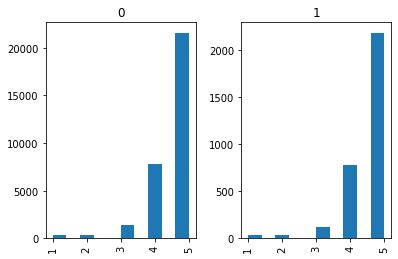

In [19]:
reviews['bulk']= reviews['username'].apply(lambda x : 1 if x in bulk.index else 0)
#gives us the category whether a rating is bulk or not
from matplotlib import pyplot
#series.hist(by=series)
print(reviews.rating.hist(by=reviews.bulk))
print(reviews[reviews.bulk==1].rating.describe())
print(reviews[reviews.bulk==0].rating.describe())


### Distribution of User rating

*** Rating distribution ***
5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: rating, dtype: int64


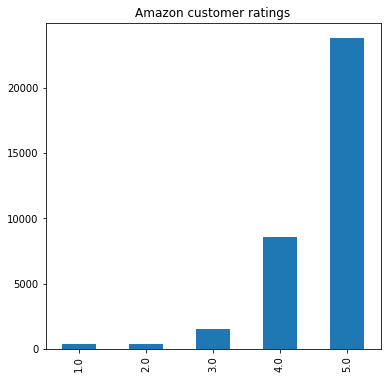

In [20]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

# 3. Find the NPS net promoter score of amazon
- What's NPS score ?
- How do we calculated for amazon  ?

# NPS Score ( Net promoter score ) 

#### Net Promoters Score helps us evaluate customer satisfaction and loyalty

Rating 1,2,3 - Detractors <br>
Rating 4   - Passive <br>
Rating 5 - Promoters <br>

NPS = (Promoters - Detractors)/Total ratings * 100

In [21]:
NPS_score = round (100*((star.loc[5])-sum(star.loc[1:3]))/sum(star.loc[:]),2)
print (" NPS score of Amazon is : "  + str(NPS_score))


 NPS score of Amazon is : 61.99


# 4. Pick a product and deep dive

In [22]:
kindle = reviews[reviews.name=='Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,,']

In [23]:
kindle.isnull().sum()
# The dataset looks good to go

name            0
asins           0
brand           0
categories      0
keys            0
manufacturer    0
date            0
dateAdded       0
dateSeen        0
doRecommend     0
numHelpful      0
rating          0
sourceURLs      0
text            0
title           0
username        0
bulk            0
dtype: int64

# 5. [Paper white kindle] - NPS score  ? 

 NPS score of Kindle is : 77.08


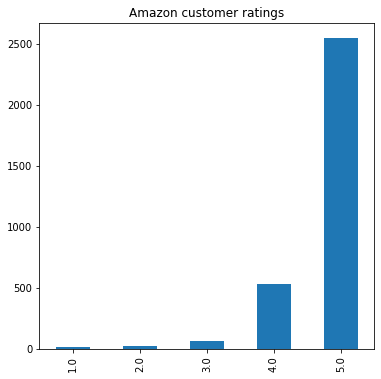

In [24]:
kindle_s = kindle.rating.value_counts()
kindle_s.sort_index(inplace=True)

Kindle_NPS_score = round (100*(kindle_s[5]-sum(kindle_s[1:3]))/sum(kindle_s),2)
print (" NPS score of Kindle is : "  + str(Kindle_NPS_score))
#better NPS than overall amazon
kindle_s.plot(kind='bar',title='Amazon customer ratings',figsize=(6,6),style='Solarize_Light2')

### What about recommendations ? How is rating related to recommendation ?

In [25]:
kindle.doRecommend.value_counts()

True     3111
False      65
Name: doRecommend, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f443ff9fb38>,
      dtype=object)

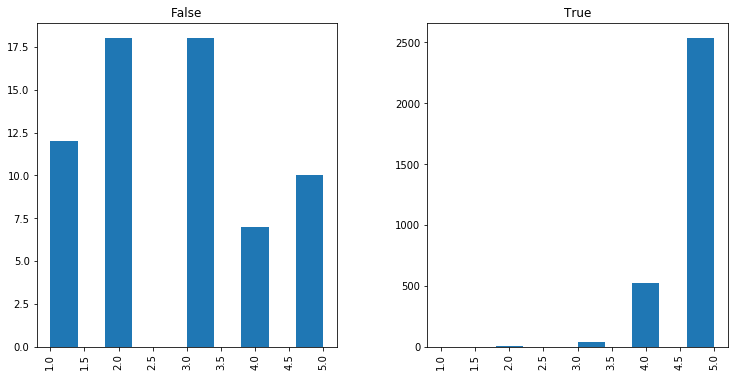

In [26]:
kindle.rating.hist(by=kindle.doRecommend,figsize=(12,6))

In [27]:
plus_kindle = kindle[kindle.doRecommend==True].rating.value_counts()
plus_kindle.sort_index(inplace=True)
recomm_NPS = round(100*(sum(plus_kindle[4:5])-sum(plus_kindle[1:2]))/sum(plus_kindle),2)
minus_kindle = kindle[kindle.doRecommend==False].rating.value_counts()
minus_kindle.sort_index(inplace=True)
notrecomm_NPS = round(100*(sum(minus_kindle[4:5])-sum(minus_kindle[1:2]))/sum(minus_kindle),2)
print("Those who recommend amazon kindle generate high NPS score of " + str(recomm_NPS))
print("Those who DO NOT recommend kindle produce a NPS score of " + str(notrecomm_NPS))
print(" ~ pretty much correct definition of NPS score")


Those who recommend amazon kindle generate high NPS score of 98.23
Those who DO NOT recommend kindle produce a NPS score of -20.0
 ~ pretty much correct definition of NPS score


# 6. [Paper white kindle] - Plot time series for reviews 
- How to handle date time text ?
- How to plot time series on a graph ? 
- How does the graph look like in small intervals of 5 days or 10 days or 30 days ?
- Did the performance (NPS) go up or down with time ?


/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


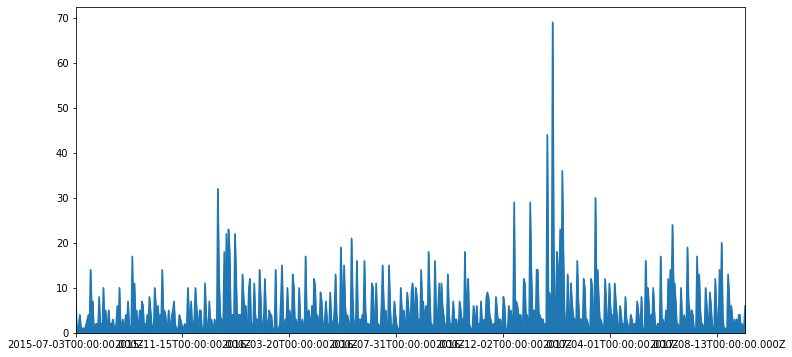

In [28]:
kindle['temp'] = kindle.date.apply(lambda x : pd.to_datetime(x))
kindle_review_dates = kindle.date.value_counts()
kindle_review_dates.sort_index(inplace=True)
kindle_review_dates.plot(kind='area',figsize=(12,6))

In [29]:
rating_perdate = kindle_review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:20]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()

1     8
12    3
6     2
10    1
9     1
8     1
7     1
5     1
3     1
2     1
dtype: int64

#### Insight 
1. January month has the highest number of peaks >> Activity is high >> More Sales during Jan ( We all know)
2. There is high degree of variance in reviews added over time



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4439d2c320>]],
      dtype=object)

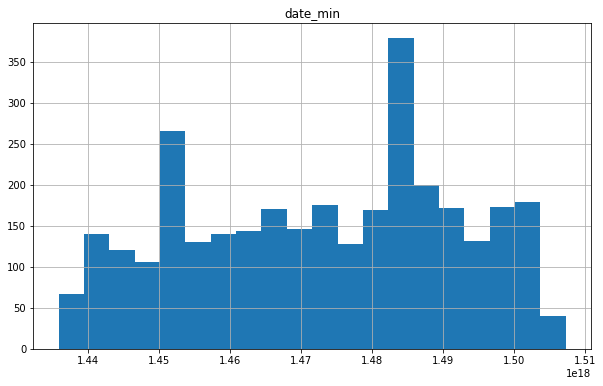

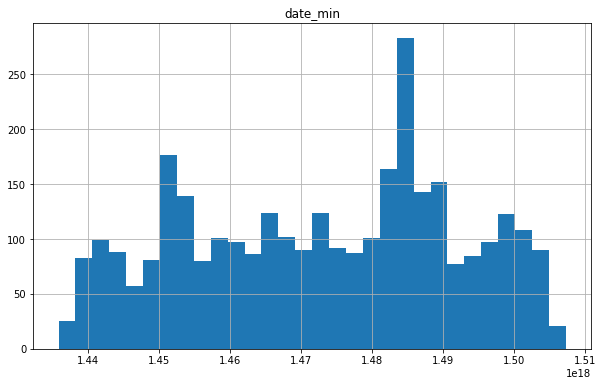

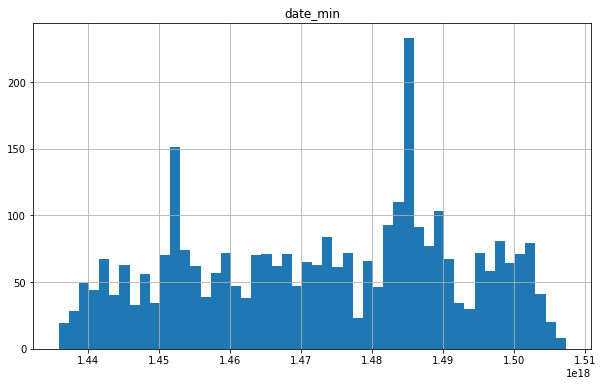

In [30]:
rating_series = pd.DataFrame(kindle.date)
dforms=[]
for x in rating_series.date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))


In [31]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)    

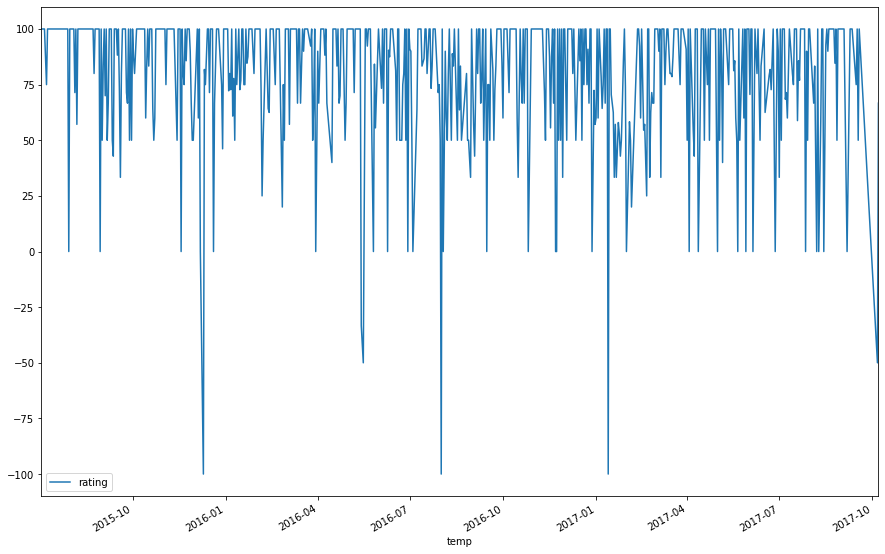

In [32]:
NPS_overtime = kindle[['temp','rating']]
NPS_overtime.groupby(by='temp').agg(NPS_eval).plot(figsize=(15,10))


AxesSubplot(0.125,0.125;0.775x0.755)


/home/ayushi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,rating
timeline,
34,37.500000
26,62.237762
25,66.000000
28,68.918919
14,69.411765
20,72.277228
12,73.000000
31,74.400000
21,75.324675


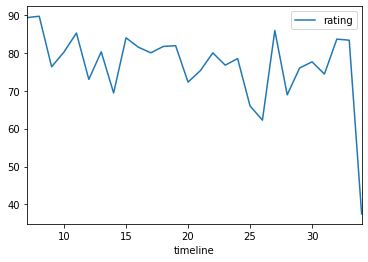

In [33]:
NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2015))))
NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='rating')

# 7. [Paper white kindle] Predict Recommendations based on reviews content
- Make a clean function
  - Remove punctuations
  - Remove stopwords
  - Stem vs Lemmatize
- Create a TFIDF vectorizer
- Create Features
- Understand and explore sentiment analysis
    - Use compound feature
- Use RandomForestClassifier
- Check the score 
        

## Can we predict Recommendations with given comments on product ?

In [50]:
comments = pd.concat([kindle['text']+". "+ kindle['title'],kindle['rating'],kindle['doRecommend']],axis=1)
comments.columns=['text','rating','recommend']

In [52]:
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk import PorterStemmer
import re 

stopwords = nltk.corpus.stopwords.words('english')
ps = PorterStemmer()
wn = nltk.WordNetLemmatizer()


def clean_stem (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [ps.stem(x) for x in temp2 if x not in stopwords]
    return temp3

def clean_lemma (sent): 
    temp1 ="".join(x for x in sent if x not in string.punctuation)
    temp2 = re.split('\W+',temp1.lower())
    temp3 = [wn.lemmatize(x) for x in temp2 if x not in stopwords]
    return temp3

text="Hello this is, my happiest place. organize, organizes, and organizing in Happy world ! with happiness ..\
so much of happy!! "

print("Stemmed " + "-".join(clean_stem(text)))
print("Lemmatized " + "-".join(clean_lemma(text)))

[nltk_data] Downloading package stopwords to /home/ayushi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayushi/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Stemmed hello-happiest-place-organ-organ-organ-happi-world-happi-much-happi-
Lemmatized hello-happiest-place-organize-organizes-organizing-happy-world-happiness-much-happy-


### Lets create vectors from the text columns

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectstem = TfidfVectorizer(analyzer=clean_stem)
vectlemm = TfidfVectorizer(analyzer=clean_lemma)

textfeatures=vectstem.fit_transform(comments['text'])
print("Stemmed - " + str(len(vectstem.get_feature_names())))

vectlemm.fit_transform(comments['text'])
print("Lemmatized - " + str(len(vectlemm.get_feature_names())))


Stemmed - 3693
Lemmatized - 4547


Stemmed has features 18 % lower than that of Lemmatized. 
    - In the above example in happy line, you can see how ineffective lemmatization can be 
    - Thus we will be applying cleanstem algo here
    - Lower features means more information density in the compressed columns

### Lets have a look on our stemmed data

In [54]:
pd.DataFrame(textfeatures.toarray()).head(15)

,0,1,2,3,4,5,6,7,8,9,...,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The column names dont make sense - Need to update them with real words
    - for this we use vectstem.vocabulary_ to modify the columns

In [55]:
textmatrix = pd.DataFrame(textfeatures.toarray(),columns=vectstem.vocabulary_)
textmatrix.head(5)

,nice,littl,set,slow,wish,would,investig,jump,like,long,...,git,vovag,sinpl,purpl,write,optioni,blackveri,onesveri,reliab,glich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
sum_scores = pd.DataFrame(textmatrix.sum(),columns=['sum_scores_TFIDF'])
sum_scores.head(10)

,sum_scores_TFIDF
nice,4.242392
littl,0.338632
set,0.515145
slow,4.349600
wish,4.576738
would,3.383977
investig,0.990953
jump,0.179253
like,0.145790
long,0.381124


In [57]:
# Need to see most important words in the reviews
# words used by many people or less frequent in sentences
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=True)[:5] 

,sum_scores_TFIDF
gripe,0.076083
grandkid,0.076083
old,0.076083
cow,0.076083
felt,0.076083


In [58]:
#high usage of words in reviews
sum_scores.sort_values(by='sum_scores_TFIDF',ascending=False)[:5]

,sum_scores_TFIDF
fool,217.397630
summer,209.501804
matt,198.910788
lighter,181.218969
purs,147.851506


### Lets build features on our data


In [59]:
pd.set_option('display.max_colwidth', 0)
comments.head()

,text,rating,recommend
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True


In [62]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

happy = "I am Happy. this is so awesome. I love life. I will be in heaven"
#when you find free food in university
print("happy " + str(sid.polarity_scores(text)))


sad = "i hate this. I am mad this is stupid. I will kill you"
#when your professor gives you a ZERO in assignment
print("sad " + str(sid.polarity_scores(sad)))

neut = "I will come. You should go. This is blue color"
#when you state facts and nothing else
print("dont care - " + str(sid.polarity_scores(neut)))

srishti = "money"
print("dss - " + str(sid.polarity_scores(srishti)))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ayushi/nltk_data...


happy {'neg': 0.0, 'neu': 0.483, 'pos': 0.517, 'compound': 0.9522}
sad {'neg': 0.714, 'neu': 0.286, 'pos': 0.0, 'compound': -0.9432}
dont care - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
dss - {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


#### Understand the output
    - sid.polarity is a dictionary
    - pos and neg indicates - positive and negative emotions in sentence
    - we should be interested in compund score which calculates the final effect
   

In [63]:
# Feature 1 : Sentiment compound value
def sentiment(x):
    score = sid.polarity_scores(x)
    return score['compound']
    
#sentiment(happy)
comments['sentiment']= comments['text'].apply(lambda x : sentiment(x))

In [64]:
# Feature 2 : Length of string

comments['length'] = comments['text'].apply(lambda x : len(re.split('\W+',x)))
comments[comments['rating']==5].head(10)

# before we proceed - we need to convert all true >> 1 and false as 0
def convert(x):
    
    if x==True:
        return 1
    else :
        return 0
    
print(convert("False"))

comments['target_rec'] = comments['recommend'].apply(lambda x : convert(x))
comments.head(5)

0


,text,rating,recommend,sentiment,length,target_rec
17214,Its a nice little set up but it's slow. I wish I would have investigated them a little more before just jumping in.. I like it but....,3.0,True,0.8271,29,1
17215,As long as apps are downloaded before leaving WIFI they work great for road trips or hunting trips!. Great for road trips!,5.0,True,0.8684,23,1
17216,Was a gift for our 8 year old daughter. Great for kids. Great for kids,5.0,True,0.9022,15,1
17217,my grandkids love it. This is the 3 one we bought.. kids love it,5.0,True,0.8555,14,1
17218,Great case ok tablet no Android play store. Weak micro usb port. It's isn't an straight out the box tablet. Had to install Android play store on it. And as far as the charging port goes I'm on my 3rd one but best buy are the best with their return policy.... Tablet not for kids,3.0,True,0.9457,58,1


In [65]:
comments[comments['rating']==1].head(5)

,text,rating,recommend,sentiment,length,target_rec
17220,This product wouldn't turn on nor charge and then store couldn't locate another one for me.. Product Issues,1.0,False,0.0000,20,0
17423,"Would not take a charge, good thing i tried before wrapping it for Christmas.. Had to return this on Christmas eve day",1.0,False,-0.3412,22,0
17443,"I didon't care for this tablet, downloading apps outside of Amazon was really confusing.. Don't like...too hard to download other apps",1.0,False,-0.1611,24,0
17729,"I am really disappointed in this Kindle....I have had many kindles, but I wanted somwthing I thoughtnwould be simple. This kindle doesn't show all my books that are in my cloud..it doesn't matter that they aren't in my device but they should still show up in my cloud...I have to go to my amazon account and transfer the book I want to my device.. Great for someone who doesn't have alot of books",1.0,False,0.7809,80,0
17887,Paper white does not allow you do use books from the library as you cannot load apps. Only books from Amazon are available to read.. Unable to access library,1.0,False,0.0088,29,0


### Lets predict recommendation !

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

# need to reset index of the comments column to match with textfeatures
new_sentiment = comments.sentiment.reset_index()['sentiment']
new_length = comments.length.reset_index()['length']

x_features = pd.concat([new_sentiment,new_length,
                        pd.DataFrame(textfeatures.toarray(),
                        columns=vectstem.vocabulary_)],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_features,comments.target_rec,test_size=0.2)

rf = RandomForestClassifier(n_jobs=-1,n_estimators=50,max_depth=90)
rfmodel=rf.fit(x_train,y_train)

y_pred = rfmodel.predict(x_test)
sorted(zip(rfmodel.feature_importances_,x_train.columns),reverse=True)[0:10]


[(0.03515641432174596, 'sentiment'),
 (0.012686178673804373, 'chargebut'),
 (0.010842155776860247, 'effici'),
 (0.010332901328807929, 'fool'),
 (0.009316657975375342, 'length'),
 (0.009245086044663264, 'carreduc'),
 (0.008422871327214377, 'flush'),
 (0.008409797632082362, 'wellfor'),
 (0.007667006044179114, 'treat'),
 (0.007607744226558549, 'matt')]

In [67]:
precision, recall, fscore , support = score(y_test,y_pred,average='binary')
print('Precision: {} / Recall :{} / Accuracy {} '.format(round(precision,3),
                                                         round(recall,3),
                                                         round((y_pred==y_test).sum()/len(y_test),3)))

Precision: 0.98 / Recall :1.0 / Accuracy 0.98 
